In [1]:
# Add Matplotlib magic command
%matplotlib inline

# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities
sum(city_data_df["type"] == "Urban")

66

In [10]:
sum(city_data_df["type"] == "Suburban")

36

In [11]:
sum(city_data_df["type"] == "Rural")

18

In [12]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city","city"])

#Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [16]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [17]:
# Create the Suburban and Rural city DataFrames
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,Randallchester,2019-02-19 03:52:47,58.55,8004803682564,9,Rural
2252,Randallchester,2019-02-11 05:42:29,25.78,9010611749008,9,Rural
2253,Randallchester,2019-03-25 13:36:46,10.37,3216382725494,9,Rural
2254,Randallchester,2019-04-07 23:42:07,10.79,1615474447641,9,Rural


In [18]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the (average) number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for each suburban and rural city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

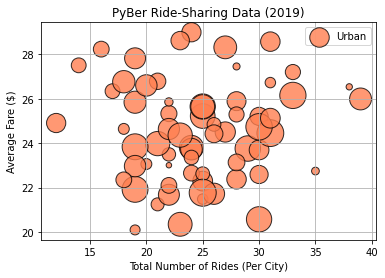

In [24]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s = 10 * urban_driver_count, 
           c = "coral",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

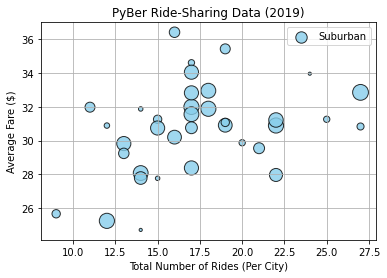

In [25]:
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s = 10 * suburban_driver_count, 
           c = "skyblue",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

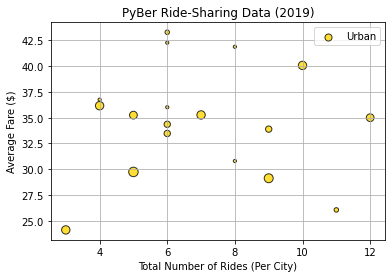

In [26]:
# Build the scatter plots for urban cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s = 10 * rural_driver_count, 
           c = "gold",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

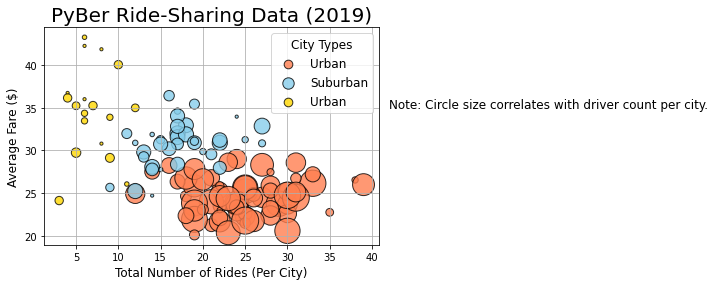

In [27]:
# Add the scatter charts for each type of city
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s = 10 * urban_driver_count, 
           c = "coral",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s = 10 * suburban_driver_count, 
           c = "skyblue",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s = 10 * rural_driver_count, 
           c = "gold",
           edgecolor = "black",
           linewidth = 1,
           alpha = 0.8,
           label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize = "12", 
                 mode = "Expanded",
                 scatterpoints = 1,
                 loc = "best",
                 title = "City Types")
for i in [0, 2]:
    lgnd.legendHandles[i]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = "12")

# Save the figure
plt.savefig("analysis/Fig1.png")

plt.show()

In [28]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [30]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [31]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
# Caclulate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [35]:
# Caclulate the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [38]:
# Calculate the mode of the ride count
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [40]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [41]:
# Calculate the measure of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean of the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median of the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode of the ride counts for urban trips is {mode_urban_ride_count}.")

The mean of the ride counts for urban trips is 24.62.
The median of the ride counts for urban trips is 24.0.
The mode of the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [42]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean of the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median of the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode of the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean of the ride counts for suburban trips is 17.36.
The median of the ride counts for suburban trips is 17.0.
The mode of the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [43]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean of the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median of the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode of the ride counts for rural trips is {mode_rural_ride_count}.")

The mean of the ride counts for rural trips is 6.94.
The median of the ride counts for rural trips is 6.0.
The mode of the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [44]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    31.25
2    19.89
3    24.28
4    13.89
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [48]:
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [49]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [50]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [51]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0    5
1    5
2    5
3    5
4    5
Name: driver_count, dtype: int64

In [52]:
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [54]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.0.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is 16.0.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean driver count for rural trips is 4.30.
The median driver count for rural trips is 4.0.
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


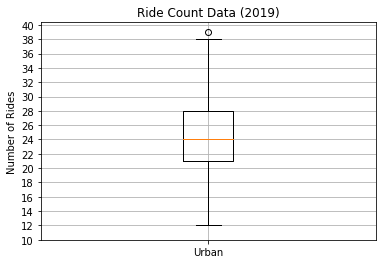

In [59]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add tthe title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

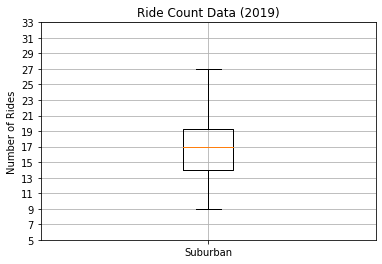

In [62]:
# Create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# Add tthe title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 35, step = 2.0))
ax.grid()
plt.show()

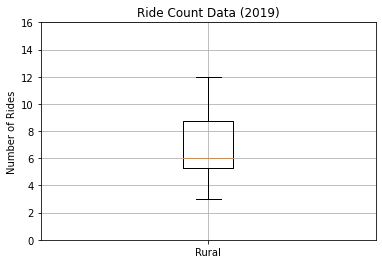

In [64]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# Add tthe title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 18, step = 2.0))
ax.grid()
plt.show()

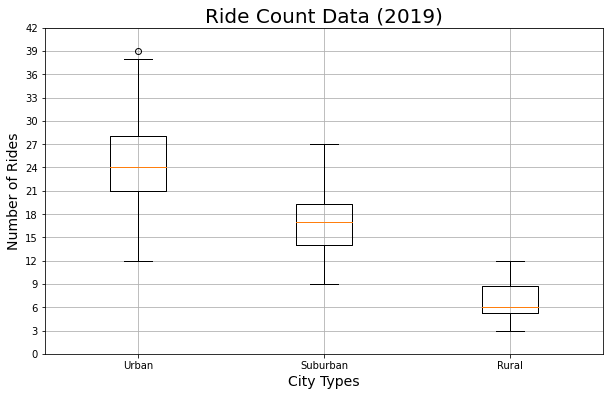

In [65]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [68]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


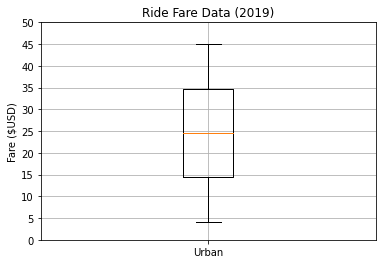

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [70]:
# Create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

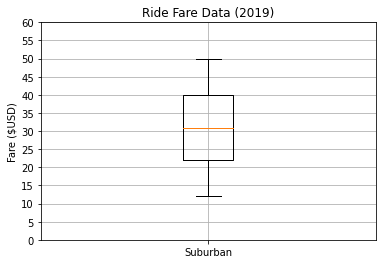

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [74]:
# Create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 65, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

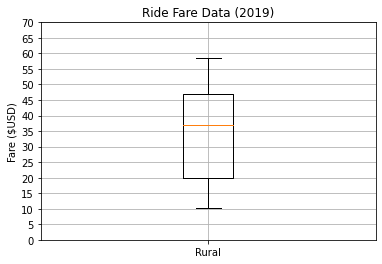

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [77]:
# Create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 71, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

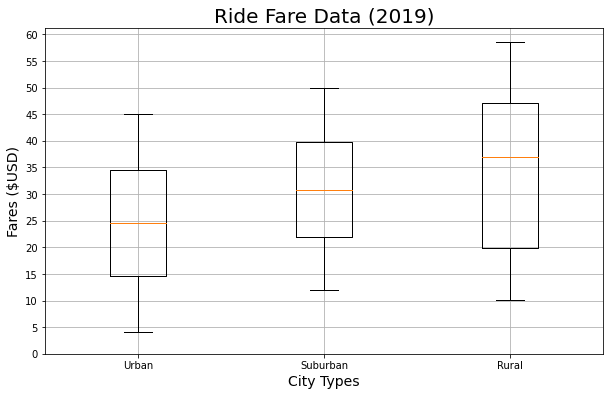

In [87]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]

fares_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fares ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(fares_data, labels=x_labels)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

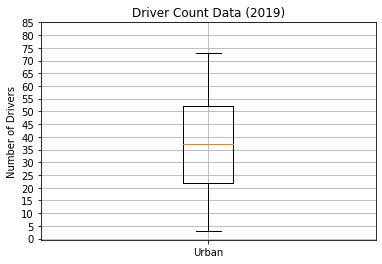

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [80]:
# Create the box-and-whisker plot for the urban driver count data
x_labels = ["Urban"]

fig,ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

# Add the titale, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

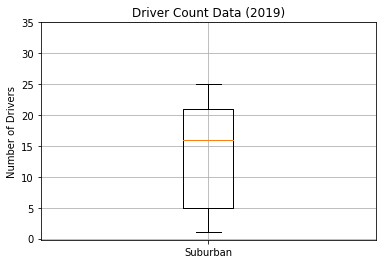

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [84]:
# Create the box-and-whisker plot for the suburban driver count data
x_labels = ["Suburban"]

fig,ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

# Add the titale, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 36, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

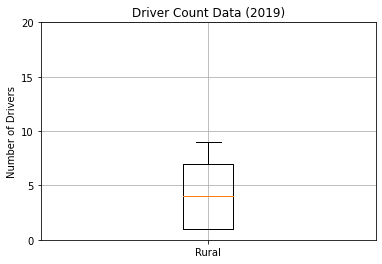

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [86]:
# Create the box-and-whisker plot for the suburban driver count data
x_labels = ["Rural"]

fig,ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

# Add the titale, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 21, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

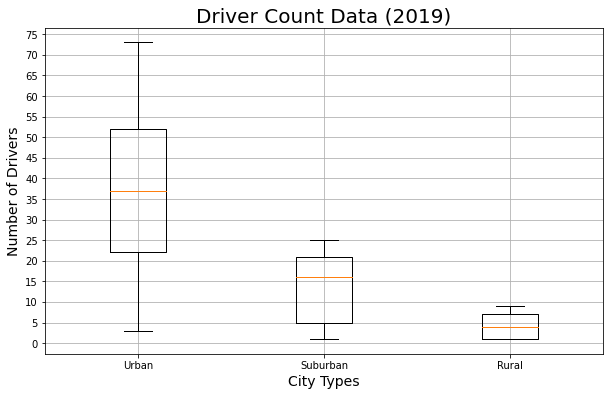

In [89]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]

drivers_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()